# Практическая задача

1. Загрузить реальный датасет для задачи регресии с использованием openml
2. Обучить модель GradientBoostingRegressor
3. Визуализировать результаты в виде графика «Фактическое vs Предсказанное»
4. Визуализировать Residual Plot

In [41]:
import openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dataset = openml.datasets.get_dataset(46917) # Concrete Strength
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.03, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
print("MSE:", mean_squared_error(y_test, y_pred), "R2:", r2_score(y_test, y_pred))

MSE: 28.843324331171342 R2: 0.8956069956080641


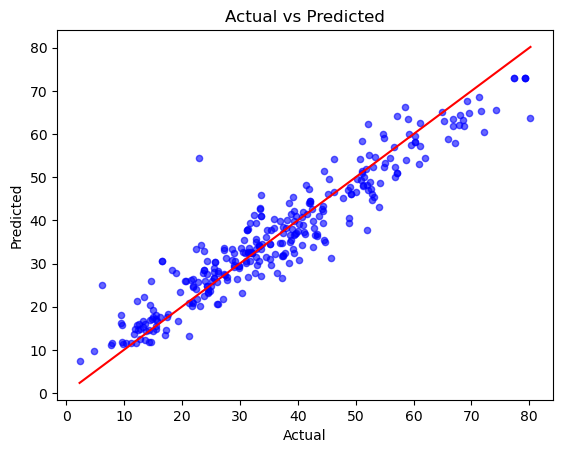

In [28]:
df_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_plot.plot.scatter(x='Actual', y='Predicted', color='blue', alpha=0.6)
lims = [df_plot.min().min(), df_plot.max().max()]
plt.plot(lims, lims, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

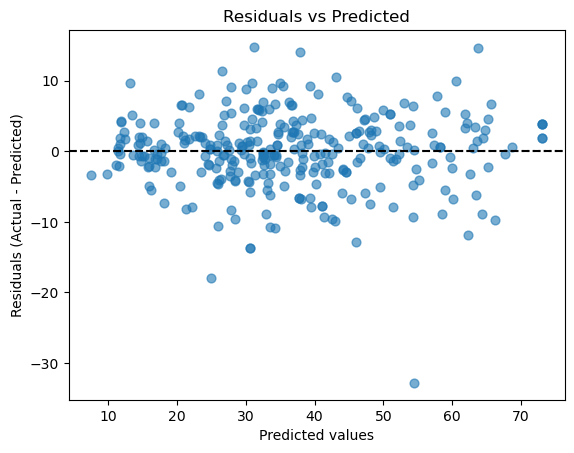

In [44]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals,
              scatter_kws={'alpha': 0.6, 's': 40}, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted')
plt.show()